# Scraping

### GNews library in Python

Google news can be modified to look at older articles from [here](https://stackoverflow.com/questions/73072802/web-scraping-articles-from-google-news).


In [1]:
import sys
# !{sys.executable} -m pip install beautifulsoup4
# !{sys.executable} -m pip install newspaper3k
# !{sys.executable} -m pip install git+https://github.com/ranahaani/GNews.git

In [25]:
from gnews import GNews
import datetime as dt
import pandas as pd
import numpy as np

import os

In [14]:
# # example of using GNews

# google_news = GNews(language = 'en')
# google_headlines = google_news.get_news('Google') # top 100 search results for Google
# google_headlines = pd.dataframe(google_headlines)

# google_headlines['date'] = pd.to_datetime(google_headlines['published date'])
# min(google_headlines['date'])
# max(google_headlines['date'])

### Headlines for one company in one year

In [3]:
first_day = np.ones(12, dtype = int)
middle_day = np.repeat(15, 12)
middle_day[1] = 14 # feb
last_day = np.tile([31, 30], 6)
last_day[7:12] = last_day[0:5]
last_day[1] = 28 # feb

start_days = []
end_days = []

for i in range(12):
    
    start_days.append(first_day[i])
    end_days.append(middle_day[i])
    
    start_days.append(middle_day[i])
    end_days.append(last_day[i])


In [3]:
print(start_days)
print(end_days)

[1, 15, 1, 14, 1, 15, 1, 15, 1, 15, 1, 15, 1, 15, 1, 15, 1, 15, 1, 15, 1, 15, 1, 15]
[15, 31, 14, 28, 15, 31, 15, 30, 15, 31, 15, 30, 15, 31, 15, 31, 15, 30, 15, 31, 15, 30, 15, 31]


In [4]:
months = np.repeat(range(12), 2) + 1
months

array([ 1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
        9, 10, 10, 11, 11, 12, 12])

In [ ]:
# scrape top 100 search results for keyword "Google" 
# for all 2-week periods in 2018

In [5]:
def get_headlines(year, keyword):
    """
    year: int 
    keyword: str, the company name
    """
    
    headlines_df = pd.DataFrame(columns = ["date", "title"])
    
    for two_week_period in range(24):
    
        month = months[two_week_period]
        start_day = start_days[two_week_period]
        end_day = end_days[two_week_period]

        start = dt.datetime(year, month, start_day)
        end = dt.datetime(year, month, end_day)

        gnews = GNews(language = "en",
                      start_date = start, 
                      end_date = end)

        news_df = pd.DataFrame(gnews.get_news(keyword))

        if news_df.shape == (0, 0):
            print(f"No news between {start} and {end} for {keyword}.\n")
            continue

        news_df['date'] = pd.to_datetime(news_df['published date'])

        headlines_df = pd.concat([headlines_df, news_df[['date', 'title']].copy()],
                                 ignore_index = True)
    
    return headlines_df

In [6]:
# example
# no news after present, which makes sense!

openai2023 = get_headlines(2023, "OpenAI")

No news between 2023-07-15 00:00:00 and 2023-07-31 00:00:00 for OpenAI.

No news between 2023-08-01 00:00:00 and 2023-08-15 00:00:00 for OpenAI.

No news between 2023-08-15 00:00:00 and 2023-08-31 00:00:00 for OpenAI.

No news between 2023-09-01 00:00:00 and 2023-09-15 00:00:00 for OpenAI.

No news between 2023-09-15 00:00:00 and 2023-09-30 00:00:00 for OpenAI.

No news between 2023-10-01 00:00:00 and 2023-10-15 00:00:00 for OpenAI.

No news between 2023-10-15 00:00:00 and 2023-10-31 00:00:00 for OpenAI.

No news between 2023-11-01 00:00:00 and 2023-11-15 00:00:00 for OpenAI.

No news between 2023-11-15 00:00:00 and 2023-11-30 00:00:00 for OpenAI.

No news between 2023-12-01 00:00:00 and 2023-12-15 00:00:00 for OpenAI.

No news between 2023-12-15 00:00:00 and 2023-12-31 00:00:00 for OpenAI.



In [10]:
# total news
print(openai2023.shape[0])

# check how many articles are outside of date range
print(sum(openai2023['date'] < 
          pd.to_datetime('2023-01-01').tz_localize('utc')))

# number of unique headlines
print(len(openai2023['title'].unique()))

# number of duplicates
print(sum(openai2023.duplicated()))

# headlines not including the keyword
openai2023.loc[~ openai2023['title'].str.contains('OpenAI', case = False)]

1270
0
1269
1


,date,title
0,2023-01-10 08:00:00+00:00,Microsoft reportedly plans to invest $10 billi...
1,2023-01-12 08:00:00+00:00,Microsoft Bets Big on the Creator of ChatGPT i...
4,2023-01-11 08:00:00+00:00,Waitlist opens for paid 'experimental' ChatGPT...
13,2023-01-15 08:00:00+00:00,Can artificial intelligence displace attorneys...
15,2023-01-07 08:00:00+00:00,"A New Area of A.I. Booms, Even Amid the Tech G..."
...,...,...
1264,2023-07-01 14:00:38+00:00,This Week's Awesome Tech Stories From Around t...
1265,2023-07-03 10:45:13+00:00,ZeroBot.ai: A Revolution in AI by John Alvarez...
1266,2023-07-03 20:45:06+00:00,Musk triggers controversy after imposing restr...
1268,2023-07-01 17:30:00+00:00,How to Block AI Chatbots From Scraping Your We...


# Collecting data

In [27]:
os.makedirs('headlines', exist_ok = True)

for year in range(2020, 2023+1):
    
    headlines_df = get_headlines(year, "Twitter")
    
    file = "headlines/" + str(year) + "_TWIT_headlines.csv"
    headlines_df.to_csv(file, index = False)

No news between 2020-12-01 00:00:00 and 2020-12-15 00:00:00 for Twitter.

No news between 2020-12-15 00:00:00 and 2020-12-31 00:00:00 for Twitter.



KeyboardInterrupt: 

# After getting the data...

The `GNews` library can only retrieve like 10,000 headlines per day so I collected the data across a few days and saved them. 

In [183]:
google = pd.DataFrame(columns = ['date', 'title'])

for year in range(2018, 2023+1):
    filename_g = "headlines/" + str(year) + "_GOOG_headlines.csv"
    
    google = pd.concat([google, pd.read_csv(filename_g)],
                       ignore_index = True)
        
google['date'] = pd.to_datetime(google['date'])

In [185]:
google.head()

,date,title
0,2018-01-03 08:00:00+00:00,How to Optimize Job Listings for Google Search...
1,2018-01-10 08:00:00+00:00,Top Google recruiter: Google uses this 'shocki...
2,2018-01-11 08:00:00+00:00,"If you invested $1,000 in Google 10 years ago,..."
3,2018-01-11 08:00:00+00:00,"When It Comes to Gorillas, Google Photos Remai..."
4,2018-01-12 08:00:00+00:00,Changing Country Codes With Google - The New Y...


<Axes: >

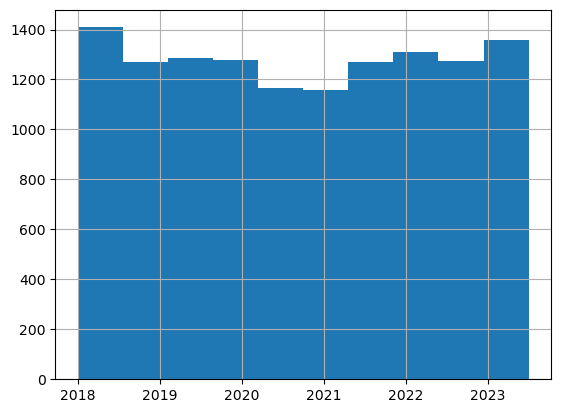

In [204]:
google['date'].hist()

In [186]:
# number of unique headlines

print(f"Unique headlines is {len(google['title'].unique())}")
print(f"Total headlines is {google.shape[0]}")
print(f"Number of headlines containing Google is {sum(pd.Series(google['title'].unique()).str.contains('google', case = False))}")
print(f"Number of duplicates is {sum(google.duplicated())}")

Unique headlines is 13105
Total headlines is 13317
Number of headlines containing Google is 12587
Number of duplicates is 200


In [187]:
# non Google headlines

google.loc[~ pd.Series(google['title']).str.contains('google', case = False)].head(10)

,date,title
44,2018-01-10 08:00:00+00:00,Adding Gmail Contacts to an iPad - The New Yor...
72,2018-01-02 08:00:00+00:00,Beijing to build $2 billion AI research park: ...
73,2018-01-04 08:00:00+00:00,Chrome is turning into the new Internet Explor...
84,2018-01-12 08:00:00+00:00,Captcha if you can: how you've been training A...
86,2018-01-10 08:00:00+00:00,Spectre: How reverse-engineering a microproces...
90,2018-01-03 08:00:00+00:00,U.S. should clear way for tech companies to he...
91,2018-01-05 08:00:00+00:00,Why Alphabet Inc. Stock Jumped 32.9% in 2017 -...
92,2018-01-03 08:00:00+00:00,"Tech, gadgets, and games we're looking forward..."
93,2018-01-09 08:00:00+00:00,Facebook video chat device Portal to cost $499...
94,2018-01-12 08:00:00+00:00,The big question hanging over the TV industry ...


# Clean headlines

Constrain to date range, remove headlines not containing the company name, and remove duplicates

In [188]:
def clean_headlines(df, keyword, start_date='2018-01-01', end_date='2023-12-31'):
    
    # standardize the hour, minute, and time to all be the same
    # will have to group by later
    df['date'] = df['date'].apply(lambda ts: ts.replace(hour=0, minute=0, second=0))
    
    # date range
    start = pd.to_datetime(start_date).tz_localize('utc')
    end = pd.to_datetime(end_date).tz_localize('utc')
    
    df = df.loc[(df['date'] >= start) & (df['date'] <= end)]
    
    # contains company name
    df = df.loc[pd.Series(df['title']).str.contains(keyword, case = False)]
    
    # remove duplicates
    
    df.drop_duplicates()
    
    return(df)

In [189]:
google = clean_headlines(google, "Google")

In [192]:
google['date']

0       2018-01-03 00:00:00+00:00
1       2018-01-10 00:00:00+00:00
2       2018-01-11 00:00:00+00:00
3       2018-01-11 00:00:00+00:00
4       2018-01-12 00:00:00+00:00
                   ...           
13312   2023-07-01 00:00:00+00:00
13313   2023-07-01 00:00:00+00:00
13314   2023-07-02 00:00:00+00:00
13315   2023-07-01 00:00:00+00:00
13316   2023-07-02 00:00:00+00:00
Name: date, Length: 12781, dtype: datetime64[ns, UTC]

### Which days do not have any headlines?

In [199]:
full_dates = pd.date_range(start = '2018-01-01',
              end = '2023-07-01').tz_localize('utc')

google_dates = google.copy().set_index('date')

full_dates.difference(google_dates.index)

DatetimeIndex(['2018-01-13 00:00:00+00:00', '2018-01-21 00:00:00+00:00',
               '2018-01-31 00:00:00+00:00', '2018-02-03 00:00:00+00:00',
               '2018-02-17 00:00:00+00:00', '2018-02-28 00:00:00+00:00',
               '2018-03-04 00:00:00+00:00', '2018-03-31 00:00:00+00:00',
               '2018-04-15 00:00:00+00:00', '2018-05-13 00:00:00+00:00',
               ...
               '2023-05-07 00:00:00+00:00', '2023-05-14 00:00:00+00:00',
               '2023-05-21 00:00:00+00:00', '2023-06-03 00:00:00+00:00',
               '2023-06-04 00:00:00+00:00', '2023-06-16 00:00:00+00:00',
               '2023-06-17 00:00:00+00:00', '2023-06-18 00:00:00+00:00',
               '2023-06-19 00:00:00+00:00', '2023-06-24 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=132, freq=None)

Text(0.5, 1.0, 'days with 0 news articles about google')

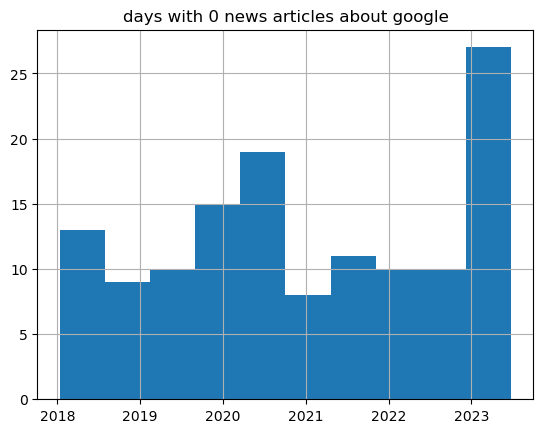

In [207]:
pd.DataFrame(full_dates.difference(google_dates.index)).hist()
plt.title("days with 0 news articles about google")

In [ ]:
# 132 out of 365*4.5 days are missing... can we just impute?

# could impute the scores with 0 positive, 0 negative, 1 neutral? no news = good news?
# and have 0 volume?

# Add sentiment scores

use this tutorial for using Sentiment Intensity Analyzer
https://www.nltk.org/howto/sentiment.html

In [40]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/amberlee/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [72]:
for headline in twitter['title'][0:5]:
    sid = SentimentIntensityAnalyzer()
    print('\n')
    print(headline)
    ss = sid.polarity_scores(headline)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')

# is it a problem that the headline contains the source?



Adjusting Twitter’s Sensitivities - The New York Times
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Twitter clarifies stance on blocking 'world leaders' as critics call for Trump's suspension - ABC News
compound: -0.4404, neg: 0.257, neu: 0.642, pos: 0.102, 

Is Twitter Really Censoring Free Speech? - Forbes
compound: 0.5542, neg: 0.0, neu: 0.626, pos: 0.374, 

This bot unrolls Twitter threads and turns them into readable blog posts - TechCrunch
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Twitter’s Shifting Positions on Trump’s Tweets - The New York Times
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

In [73]:
# isn't straightforward to remove
sum(google['title'].str.count(" - ") > 1)

332

In [145]:
def add_sentiment_scores(df):
    
    compound = []
    neg = []
    neu = []
    pos = []

    for headline in df['title']:
        # does this have to be initialized each time??
        sid = SentimentIntensityAnalyzer()
        ss = sid.polarity_scores(headline)

        compound.append(ss['compound'])
        neg.append(ss['neg'])
        neu.append(ss['neu'])
        pos.append(ss['pos'])
        
    df['compound'] = compound
    df['neg'] = neg
    df['neu'] = neu
    df['pos'] = pos
    
    return df

In [146]:
google = add_sentiment_scores(google)  
twitter = add_sentiment_scores(twitter)

In [128]:
def wrangle_day(df):
    
    # number of unique days
    count_days = len(df['date'].unique())
    
    # number of headlines per day
    volume = df.groupby('date').count().iloc[0:count_days, 1]
    
    # take avg
    df = df.groupby('date').mean(numeric_only = True)
    df['volume'] = volume
    
    return df.reset_index()
    

In [ ]:

# TO DO: figure out which days have 0 headlines!
# TO DO: check the shape of

In [160]:
tmp = wrangle_day(twitter)


0

In [165]:
tmp.sort_values('date')[1000:1030]

,date,compound,neg,neu,pos,volume
1000,2020-11-08 00:00:00+00:00,0.000000,0.000000,1.000000,0.000000,2
1001,2020-11-09 00:00:00+00:00,0.070860,0.074400,0.814600,0.111000,10
1002,2020-11-10 00:00:00+00:00,-0.231567,0.120500,0.879500,0.000000,6
1003,2020-11-11 00:00:00+00:00,0.318275,0.000000,0.832250,0.167750,4
1004,2020-11-12 00:00:00+00:00,0.141911,0.065111,0.813111,0.121778,9
1005,2020-11-13 00:00:00+00:00,-0.033525,0.079250,0.831750,0.089000,4
1006,2020-11-15 00:00:00+00:00,-0.230940,0.211400,0.663000,0.125600,5
1007,2020-11-16 00:00:00+00:00,0.097030,0.035900,0.868900,0.095200,10
1008,2020-11-17 00:00:00+00:00,0.000187,0.063600,0.875733,0.060600,15
1009,2020-11-18 00:00:00+00:00,-0.435160,0.223400,0.776600,0.000000,5


In [131]:
tmp['date']

,date,compound,neg,neu,pos,volume
0,2018-01-01 08:00:00+00:00,0.038825,0.057250,0.826000,0.116750,4
1,2018-01-02 08:00:00+00:00,-0.096692,0.105500,0.852833,0.041667,12
2,2018-01-03 08:00:00+00:00,-0.024667,0.042667,0.933556,0.023778,9
3,2018-01-04 08:00:00+00:00,-0.141137,0.141375,0.801625,0.057000,8
4,2018-01-05 08:00:00+00:00,0.001457,0.117214,0.753643,0.129214,14
...,...,...,...,...,...,...
1088,2022-03-10 19:08:27+00:00,0.000000,0.000000,1.000000,0.000000,1
1089,2022-08-13 21:27:44+00:00,0.000000,0.000000,1.000000,0.000000,1
1090,2022-10-22 20:58:18+00:00,0.000000,0.000000,1.000000,0.000000,1
1091,2022-10-30 05:06:24+00:00,0.000000,0.000000,1.000000,0.000000,1


In [106]:
import matplotlib.pyplot as plt

0
1
2
3


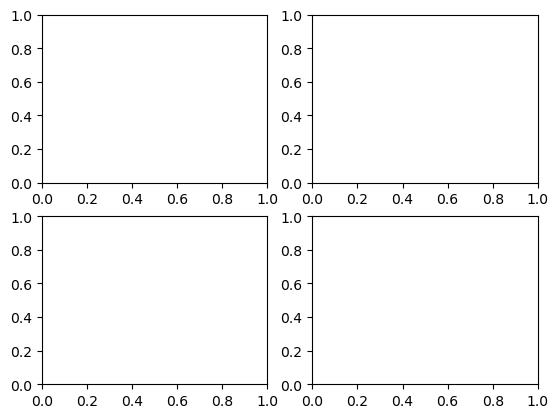

In [107]:
var = ['compound', 'neg', 'neu', 'pos', 'volume']
fig, axes = plt.subplots(nrows=2, ncols=3)

# loop over elements in subplot and data, plot each one
for ax,i in zip(axes.flatten(),range(4)):
    
    ax.plot(google['date'], google.iloc[google.shape()[0], ])
    print(i)

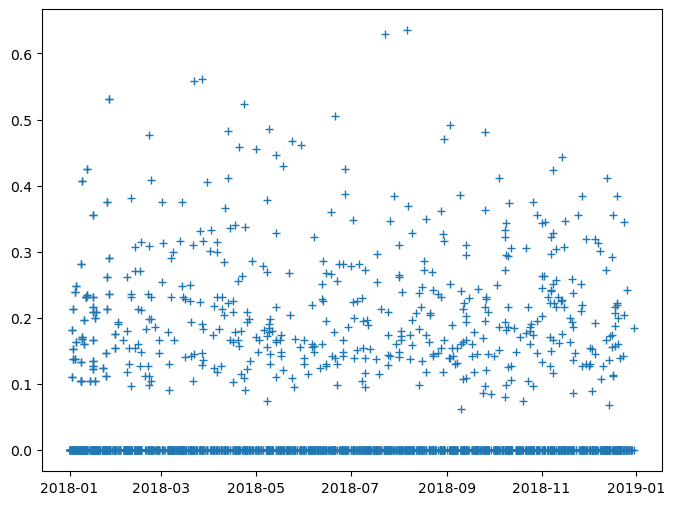

In [72]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(google2018['date'], google2018['neg'], "+");

<Axes: ylabel='Frequency'>

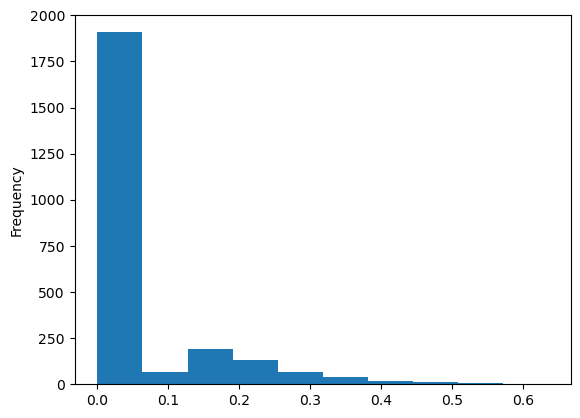

In [112]:
google2018['neg'].plot.hist()

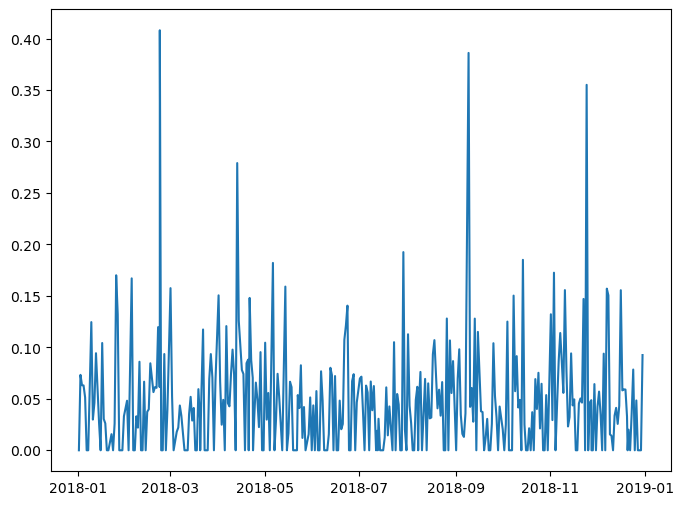

In [88]:
mean2018 = google2018.groupby(['date']).mean(numeric_only = True).reset_index()

fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(mean2018['date'], mean2018['neg'])

<Axes: ylabel='Frequency'>

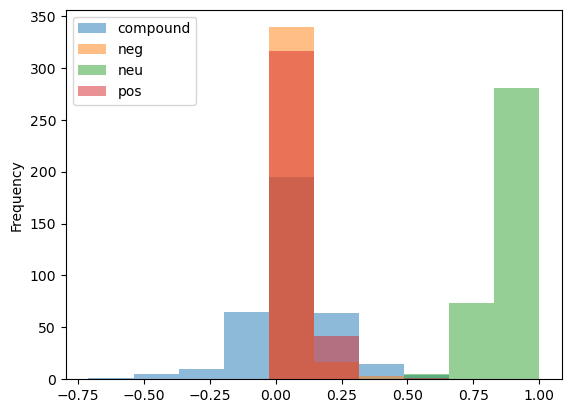

In [119]:
mean2018.iloc[:, 1:5].plot.hist(alpha = 0.5)

Text(0.5, 1.0, "Number of non-zero 'neg' scores")

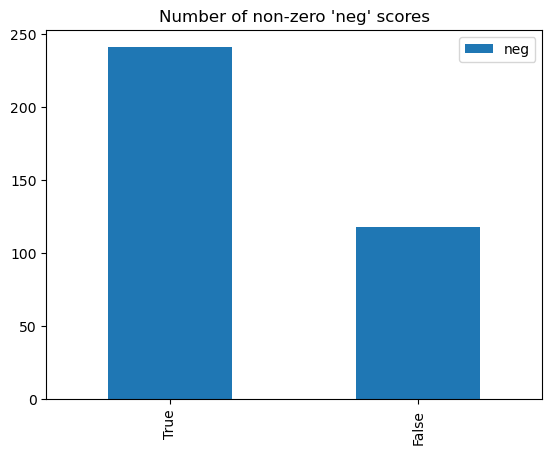

In [100]:
pd.DataFrame(mean2018['neg'] > 0).apply(pd.value_counts).plot.bar()
plt.title("Number of non-zero 'neg' scores")

<Axes: >

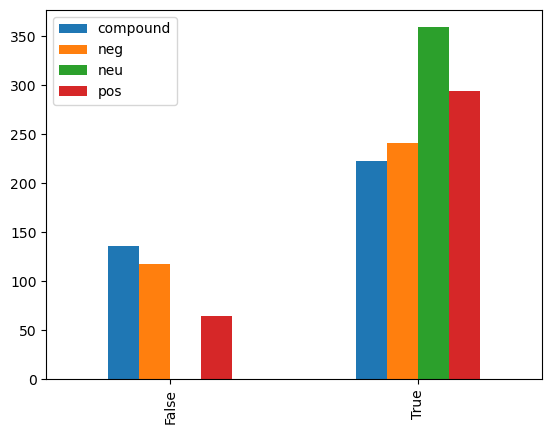

In [110]:
mean2018.iloc[:, 1:5].apply(lambda x : x > 0).apply(pd.value_counts).plot.bar()

<Axes: >

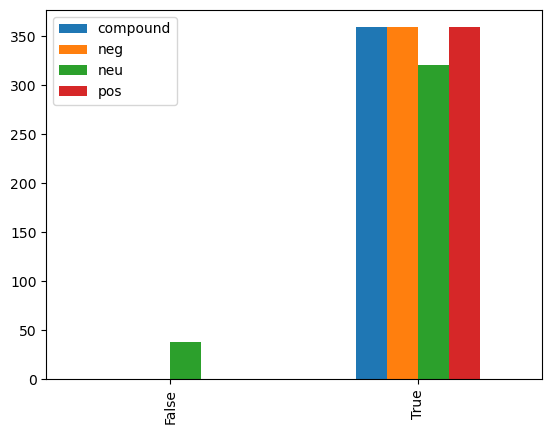

In [111]:
mean2018.iloc[:, 1:5].apply(lambda x : x < 1).apply(pd.value_counts).plot.bar()

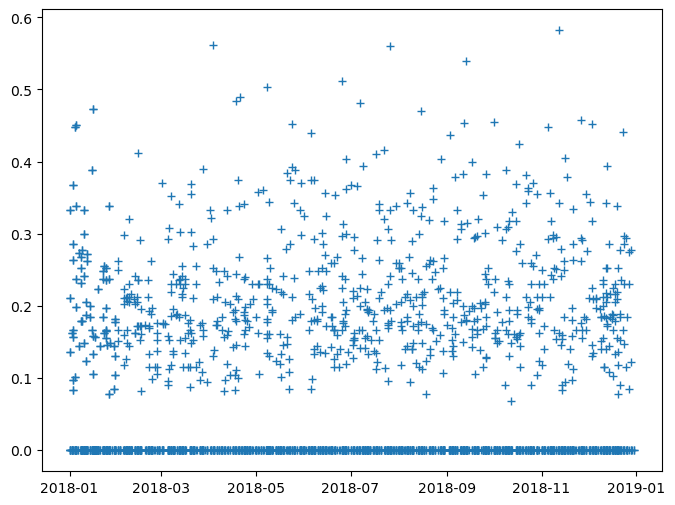

In [73]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(google2018['date'], google2018['pos'], "+");

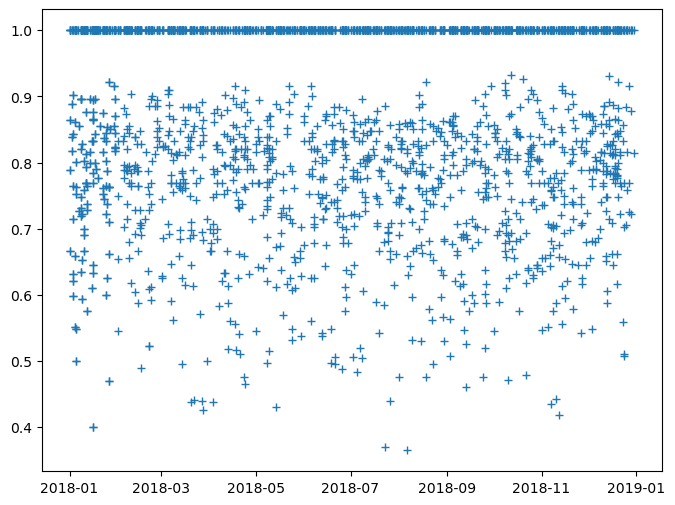

In [74]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(google2018['date'], google2018['neu'], "+");


## Things that didn't work

#### Twitter API ([tutorial](https://towardsdatascience.com/an-extensive-guide-to-collecting-tweets-from-twitter-api-v2-for-academic-research-using-python-3-518fcb71df2a))

Actually, Twitter's API has a cap of 1,500 tweets per month. So that's a no go.

#### Reddit API

PRAW API seems to have higher limits. 
